***
$$\mathbf{\text{Author: Kenneth Kusima}}$$<br>
$$\mathbf{\text{Python Kinetics Code}}$$<br>
$\mathbf{\text{Date:11/23}}$<br>
***

# KINETICS
***
$\mathbf{\text{Micro Kinetic Model for (a Simple 4-Step Mechanism) CO Oxidation}}:$<br>
#### [Link to Relevant Paper](https://pubs.acs.org/doi/10.1021/cs500377j) 

Rxn 1:&emsp;   
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $ CO(g) + * \rightleftharpoons CO^{*} $  <br> 

Rxn 2:&emsp;   
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {O_2}(g) + * \rightleftharpoons {O_2}^{*} $  <br> 

Rxn 3:&emsp;   
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {O_2}^* + * \rightleftharpoons 2{O}^* $  <br> 

Rxn 4:&emsp;   
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {CO}^{*} + {O}^{*} \rightleftharpoons {{CO}_2}^* + * $  <br> 

Rxn 5:&emsp;  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {CO}^{*} + {O_2}^{*} \rightleftharpoons {{CO}_2}^* + O^* $  <br> 

Rxn 6:&emsp;  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {CO_2}^{*} \rightleftharpoons {{CO}_2}(g) + * $  <br> 

---------------------------------
Rxn 7:&emsp;  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {NO}{(g)} + *\rightleftharpoons {{NO}^*} $  <br> 

Rxn 8:&emsp;  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {NO}^*  + {O}^* \rightleftharpoons {{{NO}_2}^*} + *$  <br> 

Rxn 9:&emsp;  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {NO}^*  + {O_2}^* \rightleftharpoons {{{NO}_2}^*} + O^*$  <br> 

Rxn 10:&emsp;  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {{{NO}_2}^*} + *\rightleftharpoons {NO}{(g)} + * $  <br> 

---------------------------------

***
$\mathbf{\text{Modelling Proposed Reaction Mechanism}}:$<br>
***
${{k_i}^j= \textrm{Rate constant/coefficient for reaction i,}} \\  \hspace{0.5cm} \textrm{for j = {f,r} ; where f = forward reaction and r  = the reverse reaction} \\ r_i = \textrm{Rate of reaction for reaction i}$

${\theta_m = \textrm{Surface Coverage of species m}} \\ \sum_{m=1}^{N} \theta_{m} = 1 \\ \hspace{1.3cm} =
\theta_{CO} + \theta_{O_2} + \theta_{O} + \theta_{*}$


Rate Equations (CO Oxidation):&emsp;

$$r_1 = k_{1}^f \cdot \textrm{P}_{CO} \cdot \theta_{*} - k_{1}^r \cdot \theta_{CO} $$

$$r_2 = k_{2}^f \cdot \textrm{P}_{O_2} \cdot \theta_{*} - k_{2}^r \cdot \theta_{O_{2}} $$

$$r_3 = k_{3}^f \cdot \theta_{O_2} \cdot \theta_{*} - k_{3}^r \cdot \theta_{O}^2 $$

$$r_4 = k_{4}^f \cdot \theta_{CO} \cdot \theta_{O} - k_{4}^r \cdot \theta_{{CO}_2} \cdot \theta_{*} $$

$$r_5 = k_{5}^f \cdot \theta_{CO} \cdot \theta_{O_2} - k_{5}^r \cdot \theta_{{CO}_2} \cdot \theta_{O} $$

$$r_6 = k_{6}^f \cdot \theta_{{CO}_2}  - k_{6}^r \cdot \textrm{P}_{{CO}_2} \cdot \theta_{*} $$



Rate Equations (NO Oxidation):&emsp;

$$r_7 = k_{7}^f \cdot \textrm{P}_{NO} \cdot \theta_{*} - k_{7}^r \cdot \theta_{NO} $$

$$r_8 = k_{8}^f \cdot \theta_{NO} \cdot \theta_{O} - k_{8}^r \cdot \theta_{{NO}_2}\cdot  \theta_{*} $$

$$r_9 = k_{9}^f \cdot \theta_{NO} \cdot \theta_{O_2} - k_{9}^r \cdot \theta_{{NO}_2} \cdot \theta_{O} $$

$$r_{10} = k_{10}^f \cdot \theta_{{NO}_2} - k_{10}^r \cdot \textrm{P}_{{NO}_2} \cdot \theta_{*} $$





In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Kinetics:
    def __init__(self,T=150, Feed_Mol_pcnt = [0.000511, 0.1019,0 , 0.0002, 0], Rate_Coeff = [], Ea_R = []):
        ######PFR Modelling
        self.Total_Volume = 1.0  #L
        self.Total_Pressure = 1.0 #atm
        self.Total_Flowrate = 658137 #*(1/3600) ## Total Flowrate L/s (GHSV * Cat.Vol) * (Convertion to per s)
        self.Volume_Step = 0.01 #Optional
        self.Volume = np.arange(0, self.Total_Volume+(2*self.Volume_Step), self.Volume_Step, dtype=float) #Volume array #Can be customized #mandatory
        self.T = T #degrees Celsius
        self.Gas_Species = ['CO','O2','CO2','NO','NO2']
        self.Surface_Species = ['*','CO*','O2*','O*','CO2*','NO*','NO2*']

        #Catalyst Info
        ##Site Densities: Pt/Pd Pd/Cu Pt/Cu Cu Only : 52 103 103 154 umol/g
        self.Site_density = 5e-6 #moles of sites/gram of catalyst
        self.Catalyst_gram =  0.14*(1000)*self.Total_Volume # mg/L -> grams
        #0.14 grams of catalyst per mililitre of reactor. #GHSV
        #NA = 6.022e23 #Avogadro's number (no. of molecules in a mole)
        
        ##Feed Info
        self.Feed_Mol_pcnt = Feed_Mol_pcnt
        #CO | O2 | CO2 | NO | NO2 |  #assume rest is inert if not balanced (i.e add up to 100%)
        
        self.Feed_Partial_Pressures = np.array(self.Feed_Mol_pcnt)  * self.Total_Pressure
        self.PCO,self.PO2,self.PCO2,self.PNO,self.PNO2 = list(self.Feed_Partial_Pressures)
        self.Feed_mol_frac = self.Feed_Partial_Pressures/self.Total_Pressure

        self.F_rate = self.Feed_mol_frac * self.Total_Flowrate * (1/22.4) #Initial Flowrate L/h -> mol/hr
        self.scale =22.00

        self.T0 = 150 #degrees Celsius
        
        self.Rate_Coeff = Rate_Coeff
        if self.Rate_Coeff == []:
            self.Rate_Coeff = np.array([135,1,169,1,91,1,2000,12.467,2000,12.467,91,1,151,1,50,0.5,50,0.5,91,1])
            
        self.k1f_o = self.Rate_Coeff[0]
        self.k1r_o = self.Rate_Coeff[1]
        self.k2f_o = self.Rate_Coeff[2]
        self.k2r_o = self.Rate_Coeff[3]
        self.k3f_o = self.Rate_Coeff[4]
        self.k3r_o = self.Rate_Coeff[5]
        self.k4f_o = self.Rate_Coeff[6]
        self.k4r_o = self.Rate_Coeff[7]
        self.k5f_o = self.Rate_Coeff[8]
        self.k5r_o = self.Rate_Coeff[9]
        self.k6f_o = self.Rate_Coeff[10]
        self.k6r_o = self.Rate_Coeff[11]
        self.k7f_o = self.Rate_Coeff[12]
        self.k7r_o = self.Rate_Coeff[13]
        self.k8f_o = self.Rate_Coeff[14]
        self.k8r_o = self.Rate_Coeff[15]
        self.k9f_o = self.Rate_Coeff[16]
        self.k9r_o = self.Rate_Coeff[17]
        self.k10f_o = self.Rate_Coeff[18]
        self.k10r_o = self.Rate_Coeff[19]
        
        self.Ea_R = Ea_R
        if self.Ea_R == []:
            self.Ea_R = np.array([1,1,1,1,1,1,10000,1,10000,1,1,1,1,1,10000,1,10000,1,1,1])
            
        self.Ea_R_k1f= self.Ea_R[0]
        self.Ea_R_k1r = self.Ea_R[1]
        self.Ea_R_k2f = self.Ea_R[2]
        self.Ea_R_k2r = self.Ea_R[3]
        self.Ea_R_k3f = self.Ea_R[4]
        self.Ea_R_k3r = self.Ea_R[5]
        self.Ea_R_k4f = self.Ea_R[6]
        self.Ea_R_k4r = self.Ea_R[7]
        self.Ea_R_k5f = self.Ea_R[8]
        self.Ea_R_k5r = self.Ea_R[9]
        self.Ea_R_k6f = self.Ea_R[10]
        self.Ea_R_k6r = self.Ea_R[11]
        self.Ea_R_k7f = self.Ea_R[12]
        self.Ea_R_k7r = self.Ea_R[13]
        self.Ea_R_k8f = self.Ea_R[14]
        self.Ea_R_k8r = self.Ea_R[15]
        self.Ea_R_k9f = self.Ea_R[16]
        self.Ea_R_k9r = self.Ea_R[17]
        self.Ea_R_k10f = self.Ea_R[18]
        self.Ea_R_k10r = self.Ea_R[19]
        
        
        self.k1f = self.k1f_o * np.exp(-(self.Ea_R_k1f) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k1r = self.k1r_o * np.exp(-(self.Ea_R_k1r) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k2f = self.k2f_o * np.exp(-(self.Ea_R_k2f) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k2r = self.k2r_o * np.exp(-(self.Ea_R_k2r) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k3f = self.k3f_o * np.exp(-(self.Ea_R_k3f) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k3r = self.k3r_o * np.exp(-(self.Ea_R_k3r) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k4f = self.k4f_o * np.exp(-(self.Ea_R_k4f) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k4r = self.k4r_o * np.exp(-(self.Ea_R_k4r) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k5f = self.k5f_o * np.exp(-(self.Ea_R_k5f) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k5r = self.k5r_o * np.exp(-(self.Ea_R_k5r) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k6f = self.k6f_o * np.exp(-(self.Ea_R_k6f) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k6r = self.k6r_o * np.exp(-(self.Ea_R_k6r) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k7f = self.k7f_o * np.exp(-(self.Ea_R_k7f) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k7r = self.k7r_o * np.exp(-(self.Ea_R_k7r) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k8f = self.k8f_o * np.exp(-(self.Ea_R_k8f) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k8r = self.k8r_o * np.exp(-(self.Ea_R_k8r) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k9f = self.k9f_o * np.exp(-(self.Ea_R_k9f) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k9r = self.k9r_o * np.exp(-(self.Ea_R_k9r) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k10f = self.k10f_o * np.exp(-(self.Ea_R_k10f) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k10r = self.k10r_o * np.exp(-(self.Ea_R_k10r) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        

        self.K1 = self.k1f/self.k1r
        self.K2 = self.k2f/self.k2r
        self.K3 = self.k3f/self.k3r
        self.K4 = self.k4f/self.k4r
        self.K5 = self.k5f/self.k5r
        self.K6 = self.k6f/self.k6r
        self.K7 = self.k7f/self.k7r
        self.K8 = self.k8f/self.k8r
        self.K9 = self.k9f/self.k9r
        self.K10 = self.k10f/self.k10r

        self.Equilibrium_constants = np.array([self.K1,self.K2,self.K3,self.K4,self.K5,
                                               self.K6,self.K7,self.K8,self.K9,self.K10])

        #TO STORE
        self.Flow_array = np.zeros((len(self.Volume),len(self.Feed_Mol_pcnt)))
        self.Flow_array[0,:] = self.F_rate/self.scale
        self.Partial_Pressure = np.zeros((len(self.Volume),len(self.Feed_Mol_pcnt)))
        
        self.Partial_Pressure[0,:] = [self.PCO,self.PO2,self.PCO2,self.PNO,self.PNO2]
        self.Covgs = np.zeros((7))
        self.Rxs1 = np.zeros((1))
        self.Rxs2 = np.zeros((1))
        
    
    def check_coverages(self,vec):  #Function to check if the coverages being inputted make sense (Note in this code empty sites are not inputted, they're calculated automatically)
        
        vec = [0.0 if x < 1e-20 else x for x in vec]   #np.array([0.0 if x < 1e-20 else x for x in np.any(covg)]) #Helpful for restart cases #bandaid fix
        
        vec = np.array(vec)
        count = np.count_nonzero(vec > 1.0)
        ## Setting the rest of surface to zero if one of the surface species has a coverage of 1
        if count == 1:                
            for i in range(len(vec)):
                # If the element is greater than 1, set it to 1; otherwise, set it to 0
                if vec[i] > 1:
                    vec[i] = 1
                else:
                    vec[i] = 0
        elif count > 1:
            print(vec)
            raise Exception('More than one value is characterised to have full coverage')

        if (np.round(float(np.sum(vec)),0))!=1.0 or (all(x >= 0.0 for x in vec)!=True) or (all(x <= 1.0 for x in vec)!=True):
            print(vec)
            raise Exception('Error: The initial coverages entered are not valid. Issues may include:'
                            '\n 1. Sum of initial coverages enetered does not add up to 1 ; '
                            '\n 2. Initial coverages enetered has a number X>1 or X<0 ;'
                            '\n Please double check the initial coverages entered and make the necessary corrections')
        else:
            return vec
        
    def PSSA(self):
        ##Updating Coverages
        self.th_e = 1/(1+(self.K1*self.PCO)+(self.K2*self.PO2)+np.sqrt(self.K2*self.K3*self.PO2)+\
                       ((1/self.K6)*self.PCO2)+(self.K7*self.PNO)+(self.PNO2/self.K10))
        self.th_CO = self.K1*self.PCO*self.th_e
        self.th_O2 = self.K2*self.PO2*self.th_e
        self.th_O = np.sqrt(self.K2*self.K3*self.PO2)*self.th_e
        self.th_CO2 = (1/self.K6) * self.PCO2 * self.th_e
        self.th_NO = self.K7*self.PNO*self.th_e
        self.th_NO2 = 1 - np.sum([self.th_e,self.th_CO,self.th_O2,self.th_O,self.th_CO2,self.th_NO]) #(1/self.K10)*self.PNO2*self.th_e

        self.Covgs = [self.th_e,self.th_CO,self.th_O2,self.th_O,self.th_CO2,self.th_NO,self.th_NO2] 
        self.Covgs = self.check_coverages(self.Covgs)

        ##Updating Rates of Reaction
        ##Steady State Rate of Reaction Calculations PSSA_PEA
        ###Rx1 : CO Oxidation
        self.Rx1_num = (self.k4f*self.K1*np.sqrt(self.K2*self.K3)*self.PCO*np.sqrt(self.PO2)) + \
                    (self.k5f*self.K1*self.K2*self.PCO*self.PO2) - (self.k4r*(1/self.K6)*self.PCO2) - \
                    (self.k5r*(1/self.K6)*np.sqrt(self.K2*self.K3)*np.sqrt(self.PO2)*self.PCO2)

        ###Rx2 : NO Oxidation
        self.Rx2_num = (self.k8f*self.K7*np.sqrt(self.K2*self.K3)*self.PNO*np.sqrt(self.PO2)) + \
                        (self.k9f*self.K7*self.K2*self.PNO*self.PO2) - (self.k8r*(1/self.K10)*self.PNO2) - \
                            (self.k9r*(1/self.K10)*np.sqrt(self.K2*self.K3)*np.sqrt(self.PO2)*self.PNO2)
        self.Rx1_cal = self.Rx1_num*((self.th_e)**2) 
        self.Rx2_cal = self.Rx2_num*((self.th_e)**2)
        self.Rxs1 = self.Rx1_cal
        self.Rxs2 = self.Rx2_cal
            
        return [self.Rxs1,self.Rxs2]



In [3]:
%%time
model = Kinetics(T = 101.7)
soln = model.PSSA()
print(soln)

[0.11124449210593661, 0.0012175051321299145]
CPU times: user 414 µs, sys: 70 µs, total: 484 µs
Wall time: 471 µs


In [4]:
model.Rx1_cal

0.11124449210593661

In [5]:
model.Rate_Coeff

array([1.3500e+02, 1.0000e+00, 1.6900e+02, 1.0000e+00, 9.1000e+01,
       1.0000e+00, 2.0000e+03, 1.2467e+01, 2.0000e+03, 1.2467e+01,
       9.1000e+01, 1.0000e+00, 1.5100e+02, 1.0000e+00, 5.0000e+01,
       5.0000e-01, 5.0000e+01, 5.0000e-01, 9.1000e+01, 1.0000e+00])

In [6]:
model.Partial_Pressure[0]

array([0.000511, 0.1019  , 0.      , 0.0002  , 0.      ])

# MKM

In [7]:
from main import *
MKM1 = MKModel('Atomic.csv','Stoich.csv','Param.csv') #Defining the Model

Mass is conserved. 

 The following steps have parallel reactions:
 [8, 9] 
 These should be ignored when fitting  


In [8]:
MKM1.set_initial_coverages() #Sets the initial coverages of all the surface species (Note: Empty Sites are calculated Automatically. If no option is entered, default initial coverage is zero surface species coverage on the surface)
MKM1.set_rxnconditions() #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax)
MKM1.set_limits_of_integration(Ti=0,Tf=2e4)#Sets the reange of time used in integration

(0, 20000.0)

In [9]:
MKM1.k = model.Rate_Coeff
MKM1.P = model.Feed_Partial_Pressures

In [17]:
SS_TOF_rate = MKM1.get_SS_rates_reaction()

In [11]:
MKM_ss_rx1 = np.abs(SS_TOF_rate[5])
MKM_ss_rx2 = np.abs(SS_TOF_rate[9])
MKM_ss_TOF = np.array([MKM_ss_rx1,MKM_ss_rx2])

In [12]:
# #Catalyst Info
# Total_Volume = 22e-3 #L
# ##Site Densities: Pt/Pd Pd/Cu Pt/Cu Cu Only : 52 103 103 154 umol/g
# Site_density = 52e-6 #moles of sites/gram of catalyst
# Catalyst_gram =  0.14*(1000)*Total_Volume # g/mL -> g/L -> grams
# SS_rate = MKM_ss_TOF * (Site_density*Catalyst_gram)  

In [13]:
MKM1.get_X_RC_SS()

[-0.00042929848702576476,
 0.0008523362286314019,
 1.004753408427967,
 6.482302795161991e-05,
 9.518589332546415e-08,
 1.7093657601553578e-08,
 -0.005125539197259558,
 2.345805476914345e-05,
 0.000543789684366963,
 1.4786599939939658e-07]

In [14]:
sum([-0.00042929848702576476,
 0.0008523362286314019,
 1.004753408427967,
 6.482302795161991e-05,
 9.518589332546415e-08,
 1.7093657601553578e-08,
 -0.005125539197259558,
 2.345805476914345e-05,
 0.000543789684366963,
 1.4786599939939658e-07])

1.0006832378849513

<IPython.core.display.Javascript object>


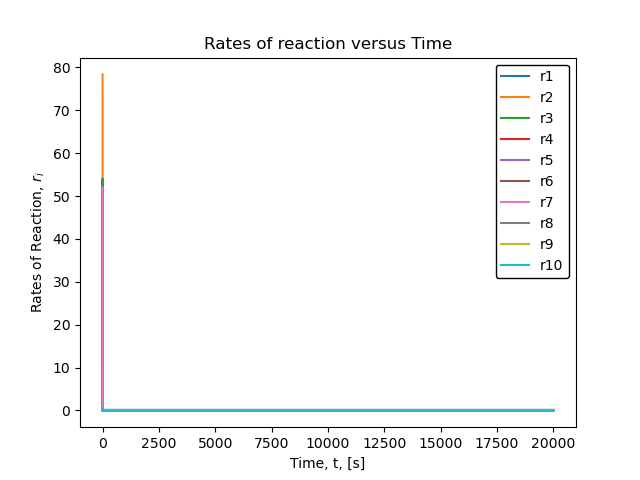

(array([[2.96891000e-05, 7.83611000e+01, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.96890911e-05, 7.83404245e+01, 4.66915736e-02, ...,
         2.90956913e-17, 1.24429861e-15, 1.89517886e-21],
        [2.96890822e-05, 7.83197664e+01, 9.33439569e-02, ...,
         1.83611369e-16, 4.97510642e-15, 9.86871084e-21],
        ...,
        [1.22446997e-08, 3.01276704e-05, 3.01113641e-05, ...,
         6.02316476e-05, 1.63042877e-08, 6.02479519e-05],
        [1.22445001e-08, 3.01270338e-05, 3.01107277e-05, ...,
         6.02297393e-05, 1.63039436e-08, 6.02460432e-05],
        [1.22443231e-08, 3.01264692e-05, 3.01101632e-05, ...,
         6.02280467e-05, 1.63036383e-08, 6.02443504e-05]]),
 array([0.00000000e+00, 2.29340079e-09, 4.58680158e-09, 2.75208095e-08,
        5.04548173e-08, 1.20625176e-07, 1.90795536e-07, 2.60965895e-07,
        5.11785110e-07, 6.99476747e-07, 8.87168384e-07, 1.07486002e-06,
        1.40834205e-06, 1.74182408e-06, 2.0753061

In [15]:
MKM1.solve_rate_reaction(plot=True)

In [16]:
SS_TOF_rate

array([0.0011952 , 0.00085412, 0.00041528, 0.00091045, 0.00028475,
       0.0011952 , 0.00051304, 0.00035895, 0.00015409, 0.00051304])